<a href="https://colab.research.google.com/github/cagBRT/computer-vision/blob/master/opencv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

many image processing and computer vision func- tions, such as thresholding and edge detection, perform bet- ter if the image is first smoothed or blurred.

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

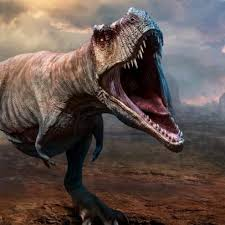

In [2]:
image = cv2.imread("dino.jpeg")
cv2_imshow( image)

The first blurring method we are going to explore is averag- ing.
As the name suggests, we are going to define a k × k slid- ing window on top of our image, where k is always an odd number. This window is going to slide from left-to-right and from top-to-bottom. The pixel at the center of this ma- trix (we have to use an odd number, otherwise there would not be a true “center”) is then set to be the average of all other pixels surrounding it.
We call this sliding window a “convolution kernel” or just a “kernel”. We’ll continue to use this terminology throu- ghout this chapter.
As we will see, as the size of the kernel increases, the more blurred our image will become.

 np.hstack function to stack our out- put images together. This method “horizontally stacks” our three images into a row. 

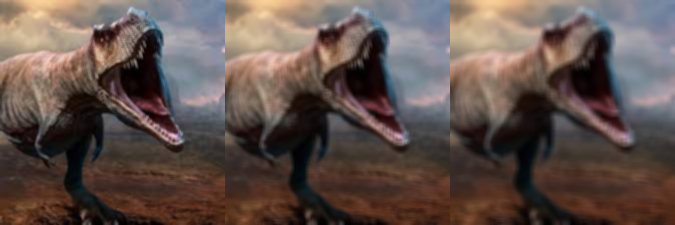

In [5]:
blurred = np.hstack([ cv2.blur(image, (3, 3)), cv2.blur(image, (5, 5)), cv2.blur(image, (7, 7))])
cv2_imshow( blurred)

Gaus- sian blurring is similar to average blurring, but instead of using a simple mean, we are now using a weighted mean, where neighborhood pixels that are closer to the central pixel contribute more “weight” to the average.
The end result is that our image is less blurred, but more naturally blurred, than using the average method discussed in the previous section.

Our images have less of a blur effect than when using the averaging method in Figure 8.2; however, the blur itself is more natural due to the computation of the weighted mean, rather than allowing all pixels in the kernel neighborhood to have equal weight.

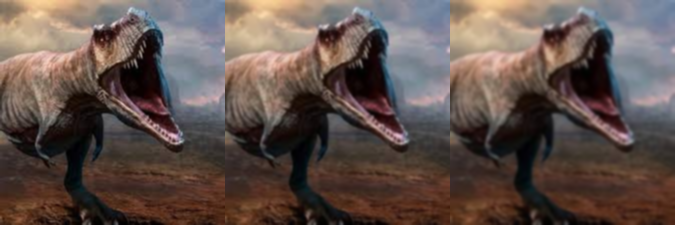

In [7]:
blurred = np.hstack([
cv2.GaussianBlur(image, (3, 3), 0),
cv2.GaussianBlur(image, (5, 5), 0),
cv2.GaussianBlur(image, (7, 7), 0)])
cv2_imshow(blurred)

the median blur method has been most ef- fective when removing salt-and-pepper noise. This type of noise is exactly what it sounds like: imagine taking a photo- graph, putting it on your dining room table, and sprinkling salt and pepper on top of it. Using the median blur method, you could remove the salt and pepper from your image.

When applying a median blur, we first define our kernel size k. Then, as in the averaging blurring method, we con- sider all pixels in the neighborhood of size k × k. But, unlike the averaging method, instead of replacing the central pixel with the average of the neighborhood, we instead replace the central pixel with the median of the neighborhood.


Median blurring is more effective at removing salt-and- pepper style noise from an image because each central pixel is always replaced with a pixel intensity that exists in the image.

Notice that we are no longer creating a “motion blur” ef- fect like in averaging and Gaussian blurring – instead, we are removing detail and noise.

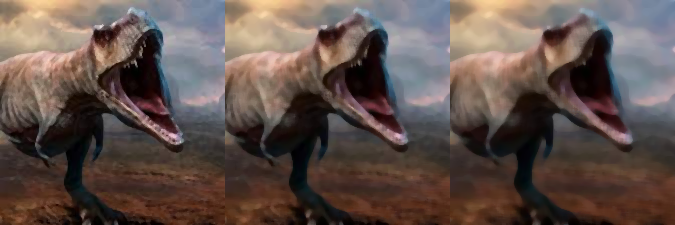

In [8]:
blurred = np.hstack([ cv2.medianBlur(image, 3), cv2.medianBlur(image, 5), cv2.medianBlur(image, 7)])
cv2_imshow(blurred)

Thus far, the intention of our blurring methods has been to reduce noise and detail in an image; however, we tend to lose edges in the image.

In order to reduce noise while still maintaining edges, we can use bilateral blurring. Bilateral blurring accomplishes this by introducing two Gaussian distributions.


The first Gaussian function only considers spatial neigh- bors, that is, pixels that appear close together in the (x, y) coordinate space of the image. The second Gaussian then models the pixel intensity of the neighborhood, ensuring that only pixels with similar intensity are included in the actual computation of the blur.

this method is able to preserve edges of an im- age, while still reducing noise. The largest downside to this method is that it is considerably slower than its averaging, Gaussian, and median blurring counterparts.

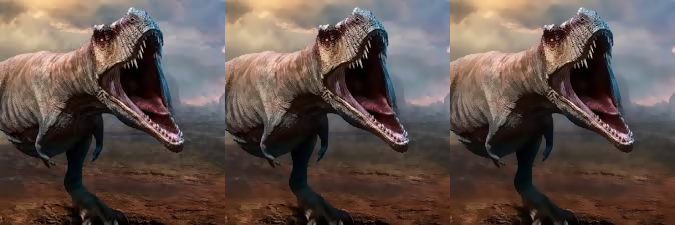

In [9]:
blurred = np.hstack([ cv2.bilateralFilter(image, 5, 21, 21), cv2.bilateralFilter(image, 7, 31, 31), cv2.bilateralFilter(image, 9, 41, 41)])
cv2_imshow(blurred)